In [3]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as la

import sklearn
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
#loading the data from the load_mnist.py
%run load_mnist.py

<Figure size 640x480 with 1 Axes>

In [4]:
# Preparing the data
trX, trY, tsX, tsY = mnist(noTrSamples=400,
                               noTsSamples=100, digit_range=[5, 8],
                               noTrPerClass=200, noTsPerClass=50)
trX = trX.T
trY = trY.T

tsX = tsX.T
tsY = tsY.T

trX_class_5 = trX[np.where(trY == 5)[0]]
trX_class_8 = trX[np.where(trY == 8)[0]]
tsX_class_5 = tsX[np.where(tsY == 5)[0]]
tsX_class_8 = tsX[np.where(tsY == 8)[0]]

In [ ]:
def subtract_mean(arr):
	mu = arr.mean(axis = 1)
	for idx in range(arr.shape[0]):
		arr[idx,:] -= mu[idx]
	return arr

def PCA2(data):
    print("--------------------------- PCA ---------------------------")
    data = subtract_mean(data)
    cov_trX = np.cov(data)
    eigval, eigvec = la.eigh(cov_trX)
    eigv = eigval
    idx = np.argsort(eigval)[::-1]
    eigvec = eigvec[:,idx]
    eigvec = eigvec[:,:10]
    eigval = eigval[idx]
    eigval = eigval[:10]
    print("eigvec",eigvec.shape,eigval.shape,data.shape)
    pca_data = np.dot(eigvec.T,data)
    print("pca_data",pca_data.shape)
    return pca_data,eigval,eigvec

In [ ]:
trX = trX.T
cov_trX = np.cov(trX)
print(cov_trX.shape)
pca_data,eigval,eigvec = PCA2(trX)
cov_pca = np.cov(pca_data)
print("eigval",eigval)
print(cov_pca.shape)
print("Total variance retained: " + str((np.trace(cov_pca)/np.trace(cov_trX))*100) + " %")
plt.matshow(cov_pca)
data = eigvec.dot(pca_data)
print(data.shape)
# for x in range(0,400,10):
#     plt.imshow((data[:,x]).reshape(28,28))
#     plt.show()

In [ ]:
#Train test split
def plot_covariance(pca_obj):
    plt.matshow(pca_obj.get_covariance())

In [5]:
def run_PCA(inp,k=10):
    pca = PCA(n_components=int(k))
    object_concept_matrix = pca.fit_transform(inp)
    Vt = pca.components_
    return object_concept_matrix,Vt

In [ ]:
# def run_PCA(inp,k=10):
#     #inp = StandardScaler().fit_transform(inp)
#     #inp = subtract_mean(inp)
#     #print(inp)
#     pca = PCA(n_components=int(k))

#     object_concept_matrix = pca.fit_transform(inp)
#     #print("ocs",object_concept_matrix.shape)
#     Vt = pca.components_

#     #original sigma is linear array of k eigen values, so we need to construct a diagonal matrix
#     S  = np.diag(pca.singular_values_)
#     #print("singular values",pca.singular_values_)
#     #print("S",S)

#     U  = inp @ Vt.T
#     print(pca.explained_variance_,pca.explained_variance_ratio_)
    
    
#     #cov_pca = pca.get_covariance()
    
#     cov_pca = object_concept_matrix.T @ object_concept_matrix
#     #print(cov_pca)
#     plt.matshow(cov_pca)
    
#     #Plotting
    
    
#     #cov_trX = np.cov(inp)
#     #print("Total variance retained: " + str((np.trace(cov_pca)/np.trace(cov_trX))*100) + " %")
    
#     #plot_covariance(pca)
#     #U = Vt.T @ inp
#     #print(U.shape,inp.shape,Vt.shape)
#     #pca_data_our = U.T @ inp
    
# #     print("Ref")
# #     print(pca_data[:5])
    
# #     pca_data2 = np.dot(object_concept_matrix.T,inp)
# #     print("our")
# #     print(pca_data2[:5])
    
# #     cov_pca_our = np.cov(pca_data2)
    
    
#     return U,S,Vt

In [6]:
def plot_images(data,title):
    f = plt.figure()
    fig, ax = plt.subplots(1, 5)
    fig.suptitle('Images for %s'%title)
    for i in range(0,5):
        #ax = f.add_subplot(1,2, x)
        #fig, ax = plt.subplots(1, 5)
        #TODO  if you can rescale, then do it
        ax[i].imshow((data[i,:]).reshape(28,28))
    plt.show()

(400, 784)
(200, 784)


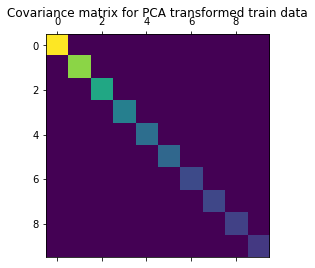

<Figure size 432x288 with 0 Axes>

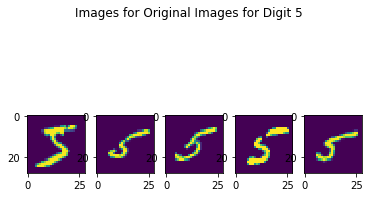

<Figure size 432x288 with 0 Axes>

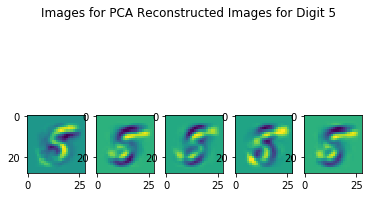

<Figure size 432x288 with 0 Axes>

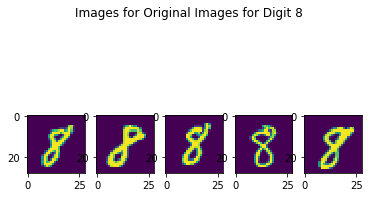

<Figure size 432x288 with 0 Axes>

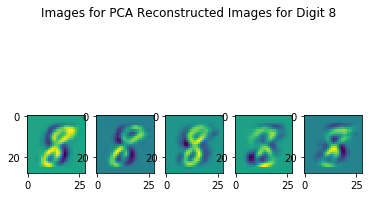

In [7]:
#Run PCA(using SVD) on the object-feature matrix, Get the covariance matrix (U.sigma.Vt)
#PCA on train data
pca_transf_data,Vtrain = run_PCA(trX)
#print(pca_transf_data.shape)

pca_transf_testdata,Vtest = run_PCA(tsX)

#Plot covariance matrix
cov_pca = pca_transf_data.T @ pca_transf_data #shape k x k (10x10)
plt.matshow(cov_pca)
plt.title('Covariance matrix for PCA transformed train data')

#Plot reconstructed images and original images
reconstructed_data = pca_transf_data @ Vtrain

print(reconstructed_data.shape)

# trX_class_5 = trX[np.where(trY == 5)[0]]
# trX_class_8 = trX[np.where(trY == 5)[0]]
reconstructed_data_class_5 = reconstructed_data[np.where(trY == 5)[0]]
reconstructed_data_class_8 = reconstructed_data[np.where(trY == 8)[0]]

print(reconstructed_data_class_5.shape)
#Plotting digit 5 transformed images

plot_images(trX_class_5,'Original Images for Digit 5')
plot_images(reconstructed_data_class_5,'PCA Reconstructed Images for Digit 5')

plot_images(trX_class_8,'Original Images for Digit 8')
plot_images(reconstructed_data_class_8,'PCA Reconstructed Images for Digit 8')
#Utest,Stest,Vtest = run_PCA(tsX)

In [ ]:
#Reconstructing the original images frm PCA transformed data 

#Plot original images (5 & 8) 

#Plot PCA reconstructed images of 5 & 8

#Implement Fisher Linear Discriminant - http://research.cs.tamu.edu/prism/lectures/pr/pr_l10.pdf
https://sebastianraschka.com/Articles/2014_python_lda.html


We have X and Y , Y being class label for 5 and 8

To compute
- Mean vectors for c1(5) and c2(8)
- $$S_B = (m1 - m2)(m1-m2)^T $$
- $$S_w = (m1 - m2)(m1-m2)^T $$

Threshold criterion - 



In [8]:
def get_predictions(w,X,threshold):
    projected_data = np.dot(X,w)
    predicted_labels = np.select([projected_data <= threshold, projected_data>threshold], [np.zeros_like(projected_data), np.ones_like(projected_data)])
    predicted_labels = np.array([5 if i[0] == 0 else 8 for i in predicted_labels.tolist()])
    return predicted_labels

In [27]:
pca_transf_trdata_class_5 = pca_transf_data[np.where(trY == 5)[0]]
pca_transf_trdata_class_8 = pca_transf_data[np.where(trY == 8)[0]]

pca_transf_testdata_class_5 = pca_transf_testdata[np.where(tsY == 5)[0]]
pca_transf_testdata_class_8 = pca_transf_testdata[np.where(tsY == 8)[0]]

#mean of all the points of class 5
g = np.mean(pca_transf_trdata_class_5,axis=0)
print(g.shape)

m1_bar = np.mean(pca_transf_trdata_class_5,axis=0).reshape(-1,1)
#print(m1_bar,m1_bar.shape,m1_bar.T.shape)
#m1_bar = m1_bar.T

#mean of all the points of class 8
m2_bar = np.mean(pca_transf_trdata_class_8,axis=0).reshape(-1,1)
#m2_bar = m2_bar.T
print(m2_bar,m2_bar.shape)

#number of class 5 images
n1 = int((trY == 5).sum())

#number of class 8 images
n2 = int((trY == 8).sum())

#Sw1 square matrix for class5 data
# Sw1 = np.zeros((10,10))
# for i in pca_transf_trdata_class_5:
#     y = i - m1_bar
#     Sw1+= np.dot(y,y.T)
# Sw1 = (1/n1)* Sw1
# print('Sw1',Sw1)

Sw1 = (1/n1)*np.dot(pca_transf_trdata_class_5.T - m1_bar,(pca_transf_trdata_class_5.T - m1_bar).T)
print('Sw1',Sw1,Sw1.shape)

Sw2 = (1/n2)*np.dot(pca_transf_trdata_class_8.T - m2_bar,(pca_transf_trdata_class_8.T - m2_bar).T)
print('Sw2',Sw2)

#Sw2 square matrix for class8 data
# Sw2 = np.zeros((10,10))
# for j in pca_transf_trdata_class_8:
#     y = j - m2_bar
#     Sw2+= np.dot(y,y.T)
# Sw2 = (1/n2)* Sw2
# print('Sw2',Sw2)

Sw = Sw1 +  Sw2
print("Sw",Sw)

#computing the direction of LDA in new projected space
print(Sw.shape)
print((m2_bar - m1_bar).T.shape)
w = np.linalg.pinv(Sw) @ (m2_bar - m1_bar)
print(w,w.shape)

m1 = np.dot(w.T,m1_bar)
m2 = np.dot(w.T,m2_bar)

print(m1)
print(m2)

# m1 = m1[0][0]
# m2 = m2[0][0]

# print("m1",m1)
# print("m2",m2)

threshold = (m1[0][0] + m2[0][0]) / 2

print("Threshold for LDA",threshold)

training_pred = get_predictions(w,pca_transf_data,threshold)
training_accuracy = (training_pred == trY.flatten()).mean() * 100
print("Training_Accuracy",training_accuracy)

test_pred = get_predictions(w,pca_transf_testdata,threshold)
testing_accuracy = (test_pred == tsY.flatten()).mean() * 100
print("Testing_Accuracy",testing_accuracy)

(10,)
[[-0.36094107]
 [ 1.34416446]
 [-0.86134979]
 [-0.51627176]
 [-0.05584678]
 [ 0.13504023]
 [-0.09006156]
 [ 0.13476574]
 [ 0.02917728]
 [-0.04652501]] (10, 1)
Sw1 [[ 7.17825685  2.40238436  1.10927278 -1.16834458  0.90966114 -0.93002535
   0.11121117  0.02597825 -0.055785   -0.071241  ]
 [ 2.40238436  2.54561992  1.46072726  0.48700239 -0.24700711 -0.56432788
   0.23512388 -0.06347429 -0.02296802 -0.1195903 ]
 [ 1.10927278  1.46072726  3.91261092 -0.33854979 -0.34390974  0.28238558
  -0.56094049  0.28975001 -0.23708317 -0.13598445]
 [-1.16834458  0.48700239 -0.33854979  2.43545005 -0.28751445 -0.37058055
   0.37651047  0.25127524  0.28080072  0.19396853]
 [ 0.90966114 -0.24700711 -0.34390974 -0.28751445  2.15629807  0.29478671
   0.28134909  0.24406943 -0.53799201  0.1487163 ]
 [-0.93002535 -0.56432788  0.28238558 -0.37058055  0.29478671  2.42479703
  -0.39164478 -0.06769583 -0.08575885  0.07983142]
 [ 0.11121117  0.23512388 -0.56094049  0.37651047  0.28134909 -0.39164478
   1.11